In [ ]:
import pandas as pd
import os



df=pd.DataFrame(columns=["id","date","title","abstract","ipcr_classifications", "embedding"])
for year in os.listdir("csv"):
    if year!=".gitignore":
        print("collecting data from "+year)
        for csv in os.listdir("csv/"+year):
            filename = os.fsdecode(csv)          
            df_temp=pd.read_csv("csv/"+year+"/"+filename)
            df = pd.concat([df, df_temp], join="outer", ignore_index=True)
print("data collected.")

In [2]:
df = df.sample(frac=1, random_state=10).reset_index(drop=True)

In [4]:
df=df[:10000]

In [6]:
import importlib
import utils.section_cluster
importlib.reload(utils.section_cluster)
from utils.section_cluster import balance_dataframe_sections
from utils.section_cluster import plot_embedding_different_sections, show_sections

balanced=balance_dataframe_sections(df)
show_sections(balanced)

trying to balance the dataset...
searching 2000 elements for section A
searching 2000 elements for section B
searching 2000 elements for section C
searching 2000 elements for section D
searching 2000 elements for section E
searching 2000 elements for section F
searching 2000 elements for section G
searching 2000 elements for section H
the dataset has been balanced
Documents within each section are: 
{'A': 2000, 'B': 2000, 'C': 2000, 'D': 2000, 'E': 2000, 'F': 2000, 'G': 2000, 'H': 2000}


Plotting PCA of embeddings for different sections


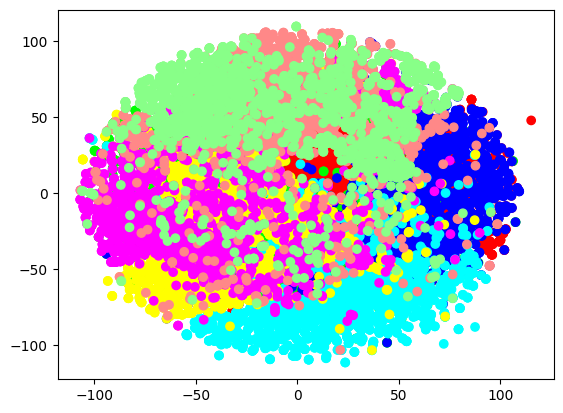

Calculating intra-cluster and inter-cluster distances


100%|██████████| 16000/16000 [00:55<00:00, 289.77it/s]


Intra-cluster vs Inter-cluster distance ratio for each class:
{'A': 0.9764277276055172, 'B': 0.9752203920482726, 'C': 0.942786586828495, 'D': 0.8775329474649777, 'E': 0.938439896942216, 'F': 0.9373510162890997, 'G': 0.9558029883045862, 'H': 0.9463103564855274}


In [6]:
import importlib
import utils.section_cluster
importlib.reload(utils.section_cluster)
from utils.section_cluster import plot_embedding_different_sections

plot_embedding_different_sections(balanced)